**Coletando dados Iniciais**

https://edufecap-my.sharepoint.com/:w:/g/personal/vitoria_silva7_edu_fecap_br/EbAa6NyeSZ5HldpBj_wowEMBxBYFj2i7zEIUdNb1MxmVlg?e=7LGLIw

In [6]:
import pandas as pd

PicMoney_BaseTransacoes = "PicMoney_Base_Transacoes_Categorias_Corrigidas.csv"
PicMoney_BasePlayers = "PicMoney-BaseCadastraldePlayers.csv"
PicMoney_BaseAvPaulista = "PicMoney-BasePedestresAvPaulista.csv"
PicMoney_BaseLojas = "PicMoney-MassadeTestecomLojaseValores.csv"
PicMoney_BaseTransacoes_Original = "PicMoney_BasedeTransacoes.csv"

dfTransacoes = pd.read_csv(PicMoney_BaseTransacoes, sep=';')
dfPlayers = pd.read_csv(PicMoney_BasePlayers, sep=';')
dfPaulista = pd.read_csv(PicMoney_BaseAvPaulista, sep=';')
dfLojas = pd.read_csv(PicMoney_BaseLojas, sep=';')
dfTransacoes_Original = pd.read_csv(PicMoney_BaseTransacoes_Original, sep=';', encoding='latin1')

colunasTransacoes = ["data","hora","bairro_estabelecimento","categoria_estabelecimento","tipo_cupom","valor_cupom","repasse_picmoney"]
colunasPlayers = ["bairro_residencial", "idade", "sexo"]
colunasLojas = ["tipo_cupom", "local_captura", "endereco_loja"]
colunasPedestreAvPaulista = ["possui_app_picmoney"]

dfSelTransacoes = dfTransacoes[colunasTransacoes].copy()
dfSelPlayers = dfPlayers[colunasPlayers].copy()
dfSelLojas = dfLojas[colunasLojas].copy()
dfSelPesdestreAvPaulista = dfPaulista[colunasPedestreAvPaulista].copy()

print("Dados que vamos utilizar na base PicMoney_BaseTransacoes: \n\n", dfSelTransacoes.head())
print("\n\nDados que vamos utilizar na base PicMoney_BasePlayers: \n\n", dfSelPlayers.head())
print("\n\nDados que vamos utilizar na base PicMoney_BaseLojas: \n\n", dfSelLojas.head())
print("\n\nDados que vamos utilizar na base PicMoney_BasePedestresAvPaulista: \n\n", dfSelPesdestreAvPaulista.head())

Dados que vamos utilizar na base PicMoney_BaseTransacoes: 

          data      hora bairro_estabelecimento    categoria_estabelecimento  \
0  10/07/2025  16:15:00              República     Restaurantes e Fast Food   
1  15/07/2025  08:15:00          Vila Prudente  Academias e Studios Fitness   
2  20/07/2025  16:45:00               Tucuruvi     Restaurantes e Fast Food   
3  20/07/2025  15:45:00                  Penha     Restaurantes e Fast Food   
4  07/07/2025  11:00:00            Santo Amaro         Cafeterias e Bistrôs   

  tipo_cupom  valor_cupom  repasse_picmoney  
0   Cashback       229.64             11.48  
1   Cashback       356.33             17.82  
2    Produto       719.06             27.61  
3    Produto       798.34             25.85  
4    Produto       718.45             28.85  


Dados que vamos utilizar na base PicMoney_BasePlayers: 

   bairro_residencial  idade       sexo
0                 Sé     55  Masculino
1           Ipiranga     44  Masculino
2          

**Explorando os Dados**

https://edufecap-my.sharepoint.com/:w:/g/personal/vitoria_silva7_edu_fecap_br/EYAsXB7GYCZHg-OuFeoSH2gBgSY4Yp68MZR2BBD_CvjpPA?e=hbgtz0

**Configurando e Padronizando Estilização das Análises**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

COR_FUNDO = '#424242'
COR_TEXTO = 'white'
PALETA_CORES = ['#6CC031', '#001B22', '#006655', '#0892A5', '#A3A3A3']
TAMANHO_FIGURA = (12, 7)
TITULO_FONTSIZE = 16
LABEL_FONTSIZE = 12

def estilizacao_padrao(ax, fig, titulo, xlabel, ylabel):
    """Aplica um tema escuro padronizado a um gráfico Matplotlib."""
    fig.patch.set_facecolor(COR_FUNDO)
    ax.set_facecolor(COR_FUNDO)

    ax.set_title(titulo, color=COR_TEXTO, fontsize=TITULO_FONTSIZE, pad=20)
    ax.set_xlabel(xlabel, color=COR_TEXTO, fontsize=LABEL_FONTSIZE)
    ax.set_ylabel(ylabel, color=COR_TEXTO, fontsize=LABEL_FONTSIZE)

    ax.tick_params(axis='x', colors=COR_TEXTO)
    ax.tick_params(axis='y', colors=COR_TEXTO)

    ax.spines['bottom'].set_color(COR_TEXTO)
    ax.spines['left'].set_color(COR_TEXTO)
    ax.spines['top'].set_color(COR_FUNDO)
    ax.spines['right'].set_color(COR_FUNDO)

**Análise Exploratória: Receita por Tipo de Cupom**


Receita Total por Tipo de Cupom:
Tipo de Cupom     Receita
      Produto 17651795.45
     Cashback 17559437.99
     Desconto 12790251.18


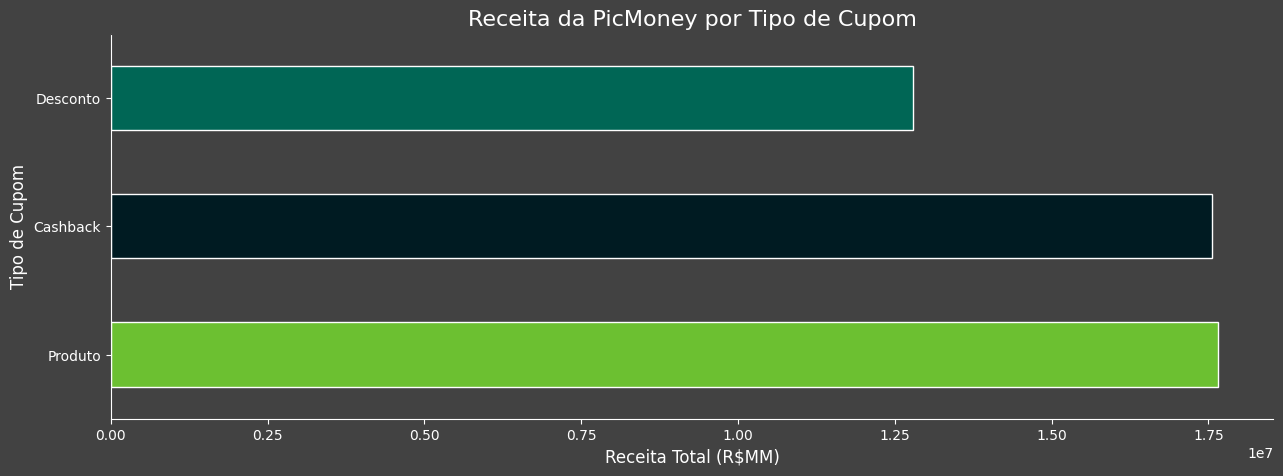

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(15, 5))
minha_paleta = ['#6CC031', '#001B22', '#006655']
cor_texto = 'white'
cor_fundo = '#424242'
fig.patch.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

dfSelTransacoes['receita_picmoney'] = dfSelTransacoes['valor_cupom'] - dfSelTransacoes['repasse_picmoney']

receita_por_cupom = dfSelTransacoes.groupby('tipo_cupom')['receita_picmoney'].sum().sort_values(ascending=False)

print("\nReceita Total por Tipo de Cupom:")
tabela_formatada = receita_por_cupom.reset_index()
tabela_formatada = tabela_formatada.rename(columns={
    'tipo_cupom': 'Tipo de Cupom',
    'receita_picmoney': 'Receita'
})
print(tabela_formatada.to_string(index=False))

receita_por_cupom.plot(kind='barh', color=minha_paleta, ax=ax)
plt.title('Receita da PicMoney por Tipo de Cupom', color=cor_texto, fontsize=16)
plt.xlabel('Receita Total (R$MM)', color=cor_texto, fontsize=12)
plt.ylabel('Tipo de Cupom', color=cor_texto, fontsize=12)

ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)

ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.spines['top'].set_color(cor_fundo)
ax.spines['right'].set_color(cor_fundo)

plt.show()

**Análise Exploratória: Penetração do App na Avenida Paulista**


Contagem de Players:
Possui o App  Quantidade de Pessoas
         Sim                  59957
         Não                  40043


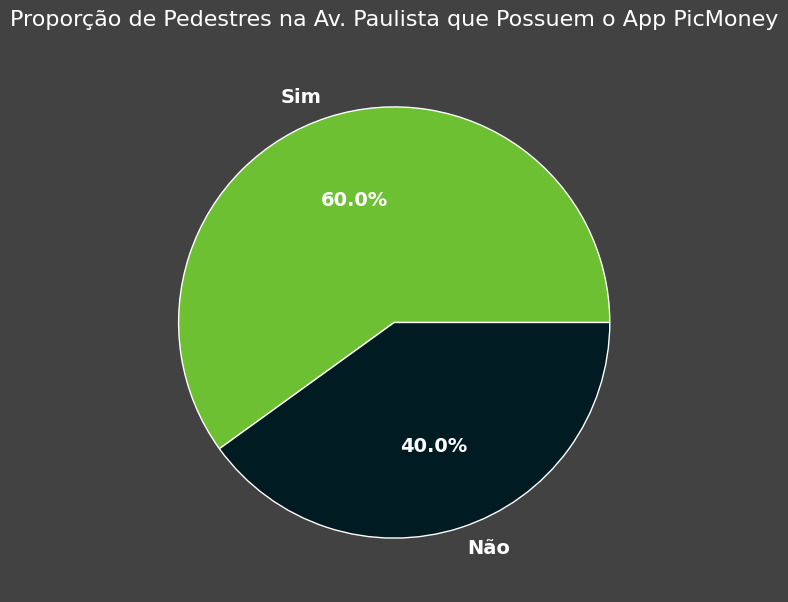

In [ ]:
COR_FUNDO = '#424242'
COR_TEXTO = 'white'
PALETA_CORES_PIE = ['#6CC031', '#001B22']
TAMANHO_FIGURA = (12, 7)
TITULO_FONTSIZE = 16

contagem_app = dfSelPesdestreAvPaulista['possui_app_picmoney'].value_counts()
tabela_contagem = contagem_app.reset_index()
tabela_contagem.columns = ['Possui o App', 'Quantidade de Pessoas']
print("\nContagem de Players:")
print(tabela_contagem.to_string(index=False))

penetracao_app_percentual = dfSelPesdestreAvPaulista['possui_app_picmoney'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=TAMANHO_FIGURA)
fig.patch.set_facecolor(COR_FUNDO)
penetracao_app_percentual.plot(kind='pie',
                               autopct='%.1f%%',
                               colors=PALETA_CORES_PIE,
                               ax=ax,
                               textprops={'color':"w", 'fontsize': 14, 'weight': 'bold'})
ax.set_title('Proporção de Pedestres na Av. Paulista que Possuem o App PicMoney',
             color=COR_TEXTO,
             fontsize=TITULO_FONTSIZE,
             pad=20)
ax.set_ylabel('')

plt.show()

**Análise Exploratória: Repasse Médio por Categoria**


Repasse Médio por Categoria:

                              Categoria  Média de Repasse
              Clubes e Centros de Lazer             72.70
                Clínicas e Laboratórios             72.51
                   Cafeterias e Bistrôs             71.56
                 Lojas de Roupas e Moda             70.54
            Academias e Studios Fitness             69.95
                 Bares e Entretenimento             69.79
               Restaurantes e Fast Food             69.71
               Supermercados e Mercados             69.68
                  Farmácias e Drogarias             69.65
               Lanchonetes e Açaiterias             69.43
Lojas de Eletrodomésticos e Eletrônicos             68.88


/tmp/ipython-input-3757442648.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=repasse_medio_categoria.index, y=repasse_medio_categoria.values, palette=PALETA_CORES, ax=ax)
/tmp/ipython-input-3757442648.py:10: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=repasse_medio_categoria.index, y=repasse_medio_categoria.values, palette=PALETA_CORES, ax=ax)


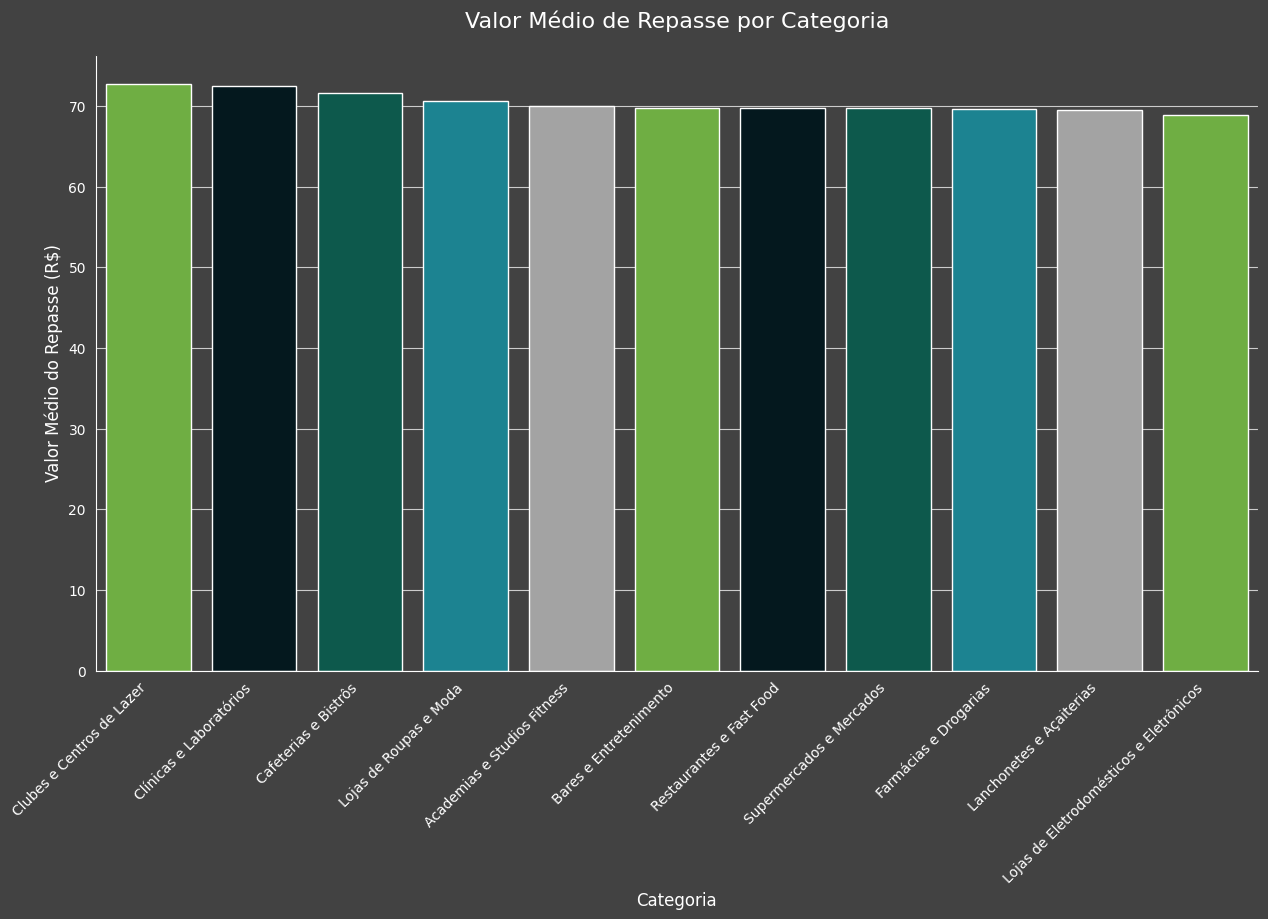

In [ ]:
repasse_medio_categoria = dfSelTransacoes.groupby('categoria_estabelecimento')['repasse_picmoney'].mean().sort_values(ascending=False)

tabela_repasse = repasse_medio_categoria.reset_index()
tabela_repasse.columns = ['Categoria', 'Média de Repasse']
tabela_repasse['Média de Repasse'] = tabela_repasse['Média de Repasse'].round(2)
print("\nRepasse Médio por Categoria:\n")
print(tabela_repasse.to_string(index=False))

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=repasse_medio_categoria.index, y=repasse_medio_categoria.values, palette=PALETA_CORES, ax=ax)
estilizacao_padrao(ax, fig, 'Valor Médio de Repasse por Categoria', 'Categoria', 'Valor Médio do Repasse (R$)')
plt.xticks(rotation=45, ha='right')

plt.show()

**Análise Exploratória: Evolução da Receita Diária**

Evolução da Receita Diária:
      Data    Receita
2025-07-01 1595660.45
2025-07-02 1554841.74
2025-07-03 1580355.62
2025-07-04 1523684.15
2025-07-05 1567963.10
2025-07-06 1567678.74
2025-07-07 1564487.39
2025-07-08 1525490.92
2025-07-09 1527635.91
2025-07-10 1556205.20
2025-07-11 1568216.88
2025-07-12 1644836.61
2025-07-13 1567857.73
2025-07-14 1513663.71
2025-07-15 1548168.74
2025-07-16 1492712.54
2025-07-17 1566980.24
2025-07-18 1497279.78
2025-07-19 1510963.88
2025-07-20 1532001.02
2025-07-21 1605059.61
2025-07-22 1539818.23
2025-07-23 1551286.41
2025-07-24 1565139.33
2025-07-25 1542992.68
2025-07-26 1538367.11
2025-07-27 1484678.98
2025-07-28 1527010.69
2025-07-29 1557880.61
2025-07-30 1541915.64
2025-07-31 1540650.98


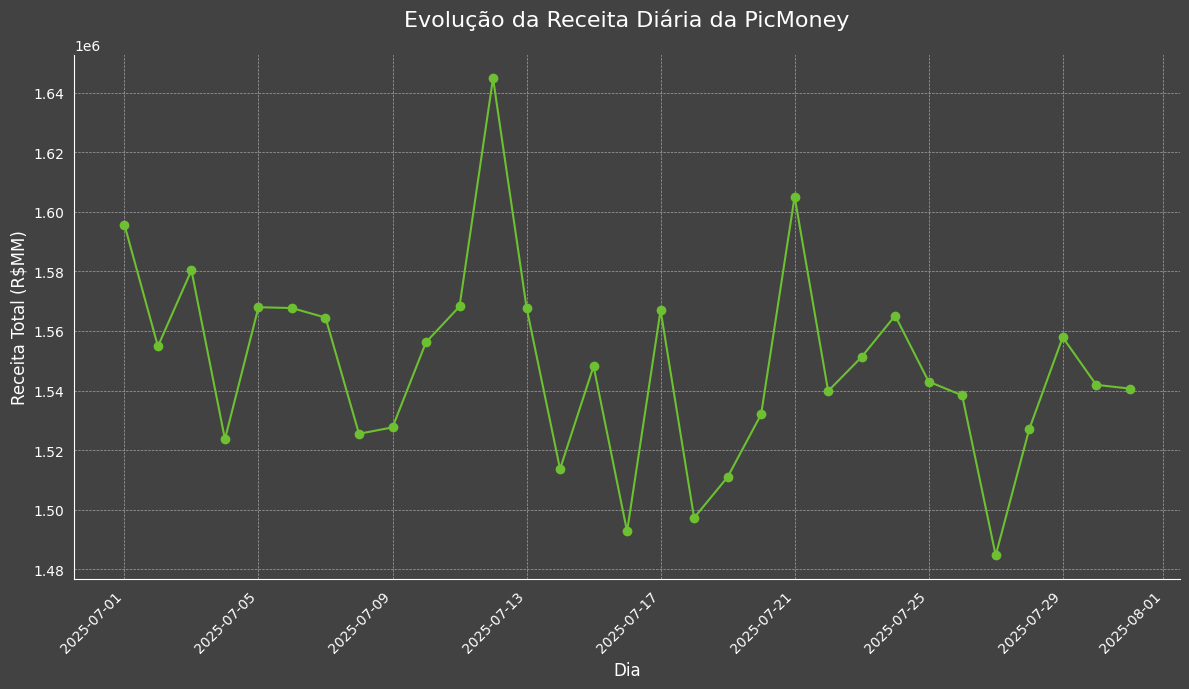

In [ ]:
print("Evolução da Receita Diária:")
dfSelTransacoes['data_formatada'] = pd.to_datetime(dfSelTransacoes['data'], dayfirst=True, errors='coerce')
receita_diaria = dfSelTransacoes.groupby(dfSelTransacoes['data_formatada'].dt.date)['receita_picmoney'].sum()
tabela_receita_diaria = receita_diaria.reset_index()
tabela_receita_diaria.columns = ['Data', 'Receita']
tabela_receita_diaria['Receita'] = tabela_receita_diaria['Receita'].round(2)
print(tabela_receita_diaria.to_string(index=False))

fig, ax = plt.subplots(figsize=TAMANHO_FIGURA)
receita_diaria.plot(kind='line', marker='o', linestyle='-', color=PALETA_CORES[0], ax=ax)
estilizacao_padrao(ax, fig, 'Evolução da Receita Diária da PicMoney', 'Dia', 'Receita Total (R$MM)')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='#A3A3A3')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**Análise Exploratória: Perfil Demográfico dos Usuários**


Estatísticas da Idade dos Usuários:
count    10000
mean        53
std         22
min         16
25%         34
50%         53
75%         71
max         91
Name: idade, dtype: int64


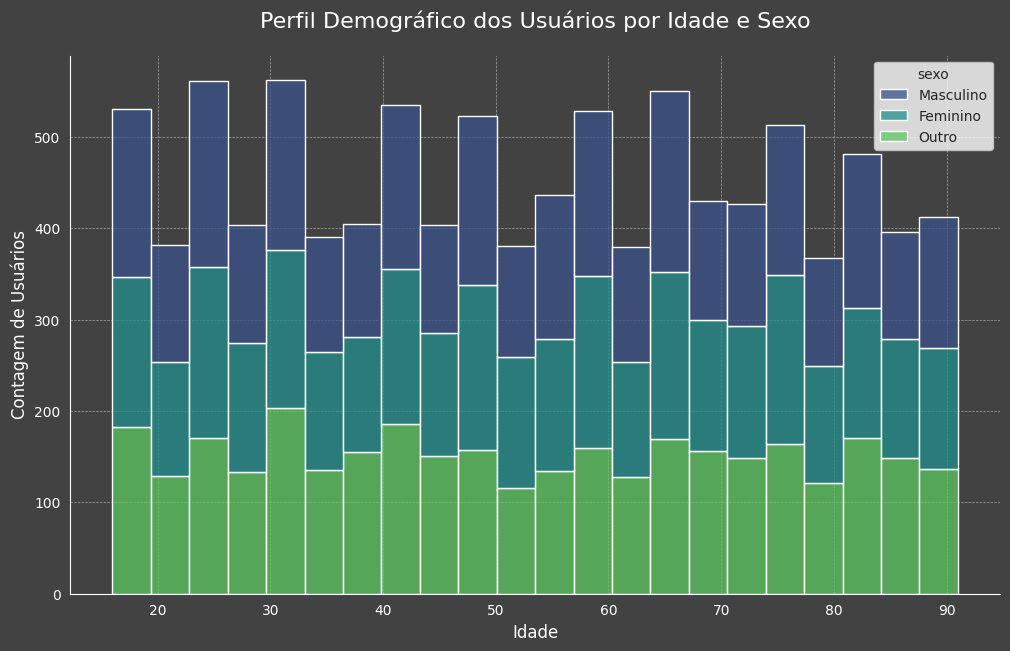

In [ ]:
print("\nEstatísticas da Idade dos Usuários:")
estatisticas_idade = dfSelPlayers['idade'].describe()
estatisticas_formatadas = estatisticas_idade.round(0).astype(int)
print(estatisticas_formatadas)

fig, ax = plt.subplots(figsize=TAMANHO_FIGURA)

sns.histplot(
    data=dfSelPlayers,
    x='idade',
    hue='sexo',
    multiple='stack',
    palette='viridis',
    ax=ax
)

estilizacao_padrao(ax, fig, 'Perfil Demográfico dos Usuários por Idade e Sexo', 'Idade', 'Contagem de Usuários')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='#A3A3A3')

plt.show()

**Verificação da Qualidade dos Dados**

https://edufecap-my.sharepoint.com/:w:/g/personal/vitoria_silva7_edu_fecap_br/ES_id_4qnt5IknB9Fj61-ZwBrmyvhc-VQ2dbYNL0kE_thQ?e=6WPxRZ

**Qualidade dos Dados: Verificação de Consistência Semântica (Categoria vs Estabelecimento)**

In [ ]:
print("Colunas da Base Transações:")
print(dfTransacoes_Original.columns)
print("\n\n Primeiras Linhas:")
print(dfTransacoes_Original.head())

estabelecimentos_para_checar = ['Outback', 'Mcdonald', 'Starbucks', 'Cobasi', 'Ipiranga']
evidencias = pd.DataFrame()

for nome in estabelecimentos_para_checar:
    if 'nome_estabelecimento' in dfTransacoes_Original.columns and 'categoria_estabelecimento' in dfTransacoes_Original.columns:
        filtro = dfTransacoes_Original[dfTransacoes_Original['nome_estabelecimento'].str.contains(nome, case=False, na=False)]

        if not filtro.empty:
            amostra = filtro[['nome_estabelecimento', 'categoria_estabelecimento']].drop_duplicates().head(2)
            evidencias = pd.concat([evidencias, amostra])

if not evidencias.empty:
    print("\n\nAmostra de categorias inconsistentes encontradas:")
    print(evidencias.to_string(index=False))
else:
    print("\n\nNenhum dos estabelecimentos de exemplo foi encontrado.")

Colunas da Base Transações:
Index(['celular', 'data', 'hora', 'nome_estabelecimento',
       'bairro_estabelecimento', 'categoria_estabelecimento', 'id_campanha',
       'id_cupom', 'tipo_cupom', 'produto', 'valor_cupom', 'repasse_picmoney',
       'Unnamed: 12', 'Total de Transações'],
      dtype='object')


 Primeiras Linhas:
           celular        data      hora nome_estabelecimento  \
0  (61) 96497-8673  10/07/2025  16:15:00              Habib's   
1  (11) 94231-6424  15/07/2025  08:15:00            Smart Fit   
2  (11) 97965-2178  20/07/2025  16:45:00              Outback   
3  (11) 93418-4646  20/07/2025  15:45:00               Subway   
4  (11) 97973-1725  07/07/2025  11:00:00        Octavio CafÃ©   

  bairro_estabelecimento               categoria_estabelecimento id_campanha  \
0             RepÃºblica           Lojas de EletrÃ´nicos e Games     CAM2768   
1          Vila Prudente           Lojas de EletrÃ´nicos e Games     CAM6679   
2               Tucuruvi   Igrejas e L

**Qualidade dos Dados: Verificação de Coerência Geográfica (Latitude e Longitude)**

In [9]:

print("Primeiras linhas da base de pedestres: ")
print(dfPaulista[['latitude', 'longitude']].head())
print("\nDemonstração de alguns dos dados incoerentes:")

for index, row in dfPaulista.head(3).iterrows():
    lat = row['latitude']
    lon = row['longitude']
    url = f"https://www.google.com/maps/search/?api=1&query={lat},{lon}"
    print(f"Amostra da Linha {index}:")
    print(f"Coordenadas no arquivo: Latitude={lat}, Longitude={lon}")
    print(f"Verifique no mapa: {url}")

Primeiras linhas da base de pedestres: 
                  latitude                longitude
0  -23.567.430.342.750.400   -4.664.844.333.528.140
1  -23.558.687.303.969.100   -4.665.888.408.315.560
2  -23.570.847.016.535.100  -46.645.781.836.865.100
3   -2.355.617.081.756.250   -4.666.130.627.469.660
4   -2.356.254.630.989.870   -4.664.956.662.319.300

Demonstração de alguns dos dados incoerentes:
Amostra da Linha 0:
Coordenadas no arquivo: Latitude=-23.567.430.342.750.400, Longitude=-4.664.844.333.528.140
Verifique no mapa: https://www.google.com/maps/search/?api=1&query=-23.567.430.342.750.400,-4.664.844.333.528.140
Amostra da Linha 1:
Coordenadas no arquivo: Latitude=-23.558.687.303.969.100, Longitude=-4.665.888.408.315.560
Verifique no mapa: https://www.google.com/maps/search/?api=1&query=-23.558.687.303.969.100,-4.665.888.408.315.560
Amostra da Linha 2:
Coordenadas no arquivo: Latitude=-23.570.847.016.535.100, Longitude=-46.645.781.836.865.100
Verifique no mapa: https://www.google.c

**Qualidade dos Dados: Verificação de Duplicatas (Telefone na Base de Pedestres)**

In [3]:
try:
    df_para_checar = pd.read_csv(dfPaulista, sep=';', encoding='latin1')
    celular = df_para_checar.columns[0]
    duplicatas = df_para_checar[df_para_checar.duplicated(subset=[celular], keep=False)]
    print(f"\nVerificando duplicatas em '{dfPaulista}' na coluna tratada como chave-primária '{celular}':")

    if not duplicatas.empty:
        print(f"\nDuplicatas encontradas: {len(duplicatas)}.")
        print("Amostra de duplicatas:\n")
        print(duplicatas.sort_values(by=celular).head(20).to_string())
    else:
        print("\nNenhuma duplicata encontrada na primeira coluna.")

except FileNotFoundError:
    print(f"\nERRO: O arquivo '{dfPaulista}' não foi encontrado no seu ambiente.")


Verificando duplicatas em 'PicMoney-BasePedestresAvPaulista.csv' na coluna tratada como chave-primária 'celular':

Duplicatas encontradas: 130.
Amostra de duplicatas:

               celular        data   horario                       local                 latitude                longitude tipo_celular        modelo_celular possui_app_picmoney data_ultima_compra ultimo_tipo_cupom  ultimo_valor_capturado ultimo_tipo_loja  idade       sexo
1074   (11) 91054-4165  22/07/2025  18:15:00    Esquina Av. ConsolaÃ§Ã£o  -23.557.449.885.502.100   -4.666.016.505.410.900      Android           Samsung S21                 Sim         12/07/2025          Desconto                   47.90          mÃ³veis     19   Feminino
8475   (11) 91054-4165  22/07/2025  20:00:00           MetrÃ´ Brigadeiro   -2.356.979.797.518.720  -46.644.938.210.066.600      Android          Motorola G60                 Sim         03/07/2025           Produto                  390.33        esportivo     42  Masculino
27028  (1